### Dijkstra Implementation:

In [204]:
import heapq
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

In [205]:
grid1 = np.full((201,201), np.inf, dtype=np.float16)
grid1[40:70, 40:70] = -np.inf
grid1[90:130, 120:160] = -np.inf
grid1[150:180, 50:90] = -np.inf
grid1[60:100, 150:190] = -np.inf

In [206]:
origin = (0, 0)
target = (200, 200)
dirs = [(-1,0),(1,0),(0,-1),(0,1), (-1,-1), (-1,1), (1,-1), (1,1)]
costs = [1,1,1,1, np.sqrt(2), np.sqrt(2), np.sqrt(2), np.sqrt(2)]
grid1[origin] = 0
grid2 = np.copy(grid1)

In [207]:
def dijkstra(grid):
  expanded = 0
  heap = [(0, origin)]
  visited = np.full(grid.shape, False)

  parent = np.empty((201,201), dtype=object)

  while heap:
    cost, (i, j) = heapq.heappop(heap)

    if visited[i][j]:
      continue
    visited[i][j] = True
    expanded += 1

    if (i, j) == target:
      break

    for (di, dj), move_cost in zip(dirs, costs):
      ni, nj = i + di, j + dj
      if not(0 <= ni < grid.shape[0] and 0 <= nj < grid.shape[1]):
        continue
      if grid[ni][nj] != -np.inf and not visited[ni][nj]:
        if grid[ni][nj] > cost + move_cost:
          grid[ni][nj] = cost + move_cost
          heapq.heappush(heap, (cost + move_cost, (ni, nj)))
          parent[ni][nj] = (i, j)
  return grid, parent, expanded

In [208]:
grid1, parent1, expanded1 = dijkstra(grid1)
path1 = []
cell = target
while cell != origin:
    path1.append(cell)
    cell = parent1[cell]
path1.append(origin)
path1.reverse()

def path_length(path):
    dist = 0
    for (i1, j1), (i2, j2) in zip(path[:-1], path[1:]):
        di, dj = abs(i2 - i1), abs(j2 - j1)
        dist += np.sqrt(2) if di == 1 and dj == 1 else 1
    return dist

In [209]:
print("Dijkstra Distance: {}".format(grid1[target]))
print("Recovered path length: {}".format(path_length(path1)))
print("Total number of expanded nodes: {}".format(expanded1))
print("Path:")
pprint(path1)

Dijkstra Distance: 300.5
Recovered path length: 300.4163056034272
Total number of expanded nodes: 35201
Path:
[(0, 0),
 (1, 1),
 (2, 2),
 (3, 3),
 (4, 4),
 (5, 5),
 (6, 6),
 (7, 7),
 (8, 8),
 (9, 9),
 (10, 10),
 (11, 11),
 (12, 12),
 (13, 13),
 (14, 14),
 (15, 15),
 (16, 16),
 (17, 17),
 (18, 18),
 (19, 19),
 (20, 20),
 (21, 21),
 (22, 22),
 (23, 23),
 (24, 24),
 (25, 25),
 (26, 26),
 (27, 27),
 (28, 28),
 (29, 29),
 (30, 30),
 (31, 31),
 (32, 32),
 (33, 33),
 (34, 34),
 (35, 35),
 (36, 36),
 (37, 37),
 (38, 38),
 (39, 38),
 (40, 38),
 (41, 38),
 (42, 38),
 (43, 38),
 (44, 38),
 (45, 38),
 (46, 38),
 (47, 38),
 (48, 38),
 (49, 38),
 (50, 38),
 (51, 38),
 (52, 38),
 (53, 38),
 (54, 38),
 (55, 38),
 (56, 38),
 (57, 38),
 (58, 38),
 (59, 38),
 (60, 38),
 (61, 38),
 (62, 38),
 (63, 38),
 (64, 38),
 (65, 38),
 (66, 38),
 (67, 38),
 (68, 38),
 (69, 39),
 (70, 40),
 (71, 41),
 (72, 42),
 (73, 43),
 (74, 44),
 (75, 45),
 (76, 46),
 (77, 47),
 (78, 48),
 (79, 49),
 (80, 50),
 (81, 51),
 (82, 52

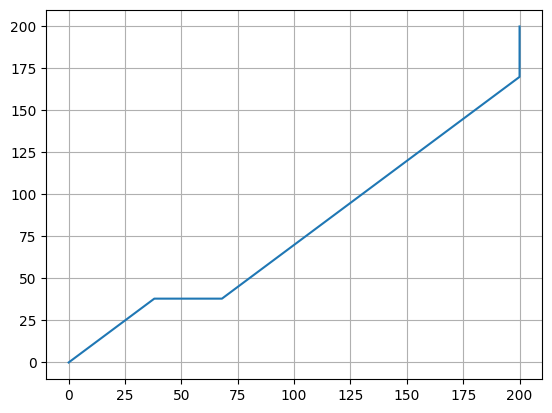

In [210]:
plt.plot([p[0] for p in path1], [p[1] for p in path1])
plt.grid()

### A* Implementation:

In [211]:
def euclidean(a, b):
  return np.sqrt((a - target[0])**2 + (b - target[1])**2)

def a_star(grid):
  expanded = 0
  heap = [(0, 0, origin)]
  visited = np.full(grid.shape, False)
  parent = np.empty(grid.shape, dtype=object)

  while heap:
    f, cost, (i, j) = heapq.heappop(heap)

    if visited[i][j]:
      continue
    visited[i][j] = True
    expanded += 1

    if (i, j) == target:
      break

    for (di, dj), move_cost in zip(dirs, costs):
      ni, nj = i + di, j + dj
      if not(0 <= ni < grid.shape[0] and 0 <= nj < grid.shape[1]):
        continue
      if grid[ni][nj] != -np.inf and not visited[ni][nj]:
        if grid[ni][nj] > cost + move_cost:
          grid[ni][nj] = cost + move_cost
          parent[ni][nj] = (i, j)
          heapq.heappush(heap, (euclidean(ni, nj) + cost + move_cost, cost + move_cost, (ni, nj)))

  return grid, parent, expanded

In [212]:
grid2, parent2, expanded2 = a_star(grid2)
path2 = []
cell = target
while cell != origin:
    path2.append(cell)
    cell = parent2[cell]
path2.append(origin)
path2.reverse()

In [213]:
print("A* Distance: {}".format(grid2[target]))
print("Recovered path length: {}".format(path_length(path2)))
print("Total number of expanded nodes: {}".format(expanded2))
print("Path:")
pprint(path2)

A* Distance: 300.5
Recovered path length: 300.4163056034272
Total number of expanded nodes: 11992
Path:
[(0, 0),
 (1, 1),
 (2, 2),
 (3, 3),
 (4, 4),
 (5, 5),
 (6, 6),
 (7, 7),
 (8, 8),
 (9, 9),
 (10, 10),
 (11, 11),
 (12, 12),
 (13, 13),
 (14, 14),
 (15, 15),
 (16, 16),
 (17, 17),
 (18, 18),
 (19, 19),
 (20, 20),
 (21, 21),
 (22, 22),
 (23, 23),
 (24, 24),
 (25, 25),
 (26, 26),
 (27, 27),
 (28, 28),
 (29, 29),
 (30, 30),
 (31, 31),
 (32, 32),
 (33, 33),
 (34, 34),
 (35, 35),
 (36, 36),
 (37, 37),
 (38, 37),
 (39, 37),
 (40, 37),
 (41, 37),
 (42, 37),
 (43, 37),
 (44, 37),
 (45, 37),
 (46, 38),
 (47, 39),
 (48, 39),
 (49, 39),
 (50, 39),
 (51, 39),
 (52, 39),
 (53, 39),
 (54, 39),
 (55, 39),
 (56, 39),
 (57, 39),
 (58, 39),
 (59, 39),
 (60, 39),
 (61, 39),
 (62, 39),
 (63, 39),
 (64, 39),
 (65, 39),
 (66, 39),
 (67, 39),
 (68, 39),
 (69, 39),
 (70, 40),
 (71, 41),
 (72, 42),
 (73, 43),
 (74, 44),
 (75, 45),
 (76, 46),
 (77, 47),
 (78, 48),
 (79, 49),
 (80, 50),
 (81, 51),
 (82, 52),
 (8

The heuristic does not over-estimate the true remaining cost since any actual path on the grid between a point and the target must be at least as long as the Euclidean distance between them.

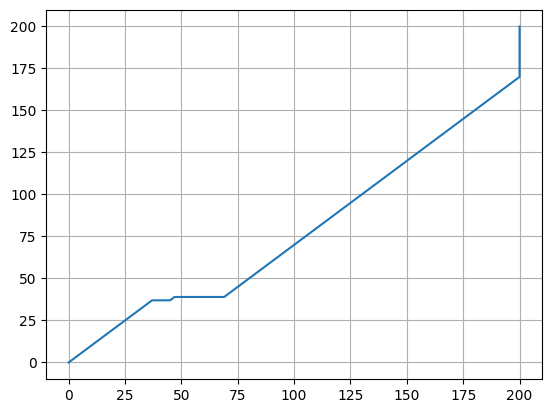

In [214]:
plt.plot([p[0] for p in path2], [p[1] for p in path2])
plt.grid()

### Comparison between Dijkstra and A*:

*   Recovered path length is the same - 300.4163056034272 units
*   Number of expanded nodes is far lesser for A* than Dijkstra - 11992 as opposed to 35201
*   A* is clearly more efficient as both return the same optimal path but less nodes are explored.